In [3]:
import pandas as pd
df = pd.read_csv('https://rosyid.sgp1.digitaloceanspaces.com/data_kelulusan.csv')
data = pd.DataFrame(df)
X_Data =  data[['mka','sks','ipk']]
Y_Target = data['statusKelulusan']
data




,mka,sks,ipk,nilaiD,nilaiE,statusKelulusan
0,65,135,3.63,0,0,TEPAT WAKTU
1,65,135,3.61,1,0,TEPAT WAKTU
2,65,135,3.53,2,0,TEPAT WAKTU
3,62,129,3.34,3,0,TEPAT WAKTU
4,63,129,3.48,1,0,TEPAT WAKTU
5,60,123,2.94,4,4,TIDAK TEPAT WAKTU
6,60,120,3.03,5,2,TIDAK TEPAT WAKTU
7,63,129,3.55,2,0,TEPAT WAKTU
8,21,41,0.24,1,19,TIDAK TEPAT WAKTU
9,63,132,3.58,2,0,TEPAT WAKTU


In [4]:
data[['mka','sks','ipk']].corr()

,mka,sks,ipk
mka,1.000000,0.997806,0.985311
sks,0.997806,1.000000,0.985947
ipk,0.985311,0.985947,1.000000


<AxesSubplot:>

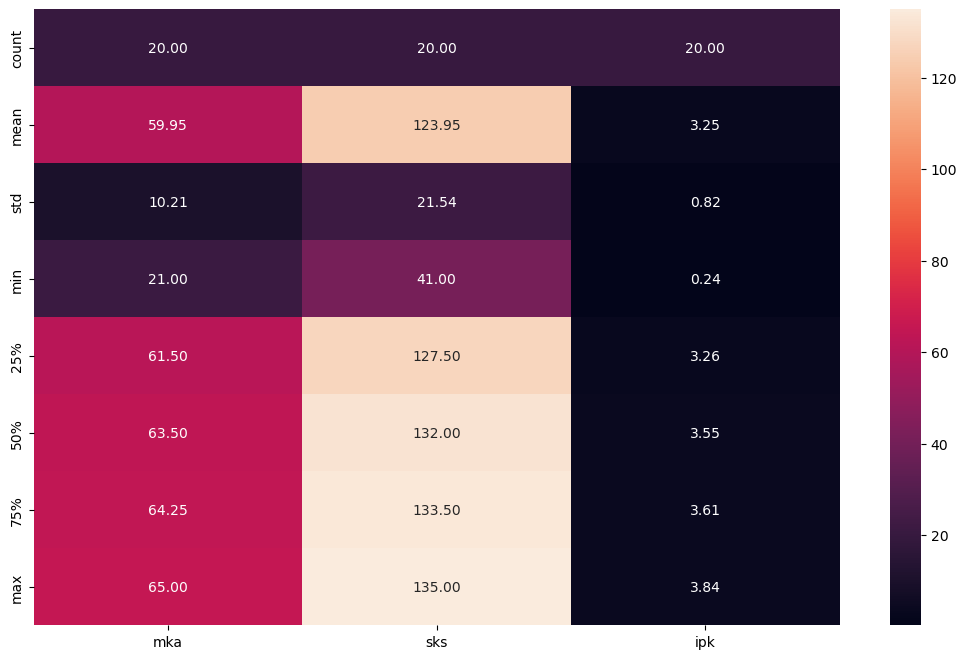

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,8))
sns.heatmap(data[['mka','sks','ipk']].describe(), annot=True, fmt=".2f")

<AxesSubplot:>

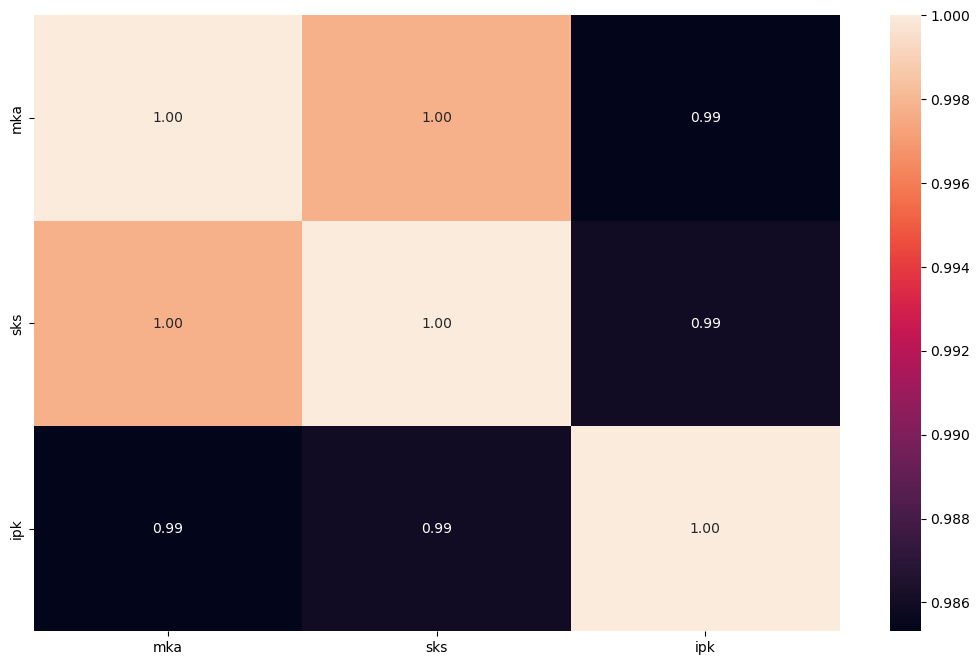

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,8))
sns.heatmap(data[['mka','sks','ipk']].corr(), annot=True, fmt=".2f")

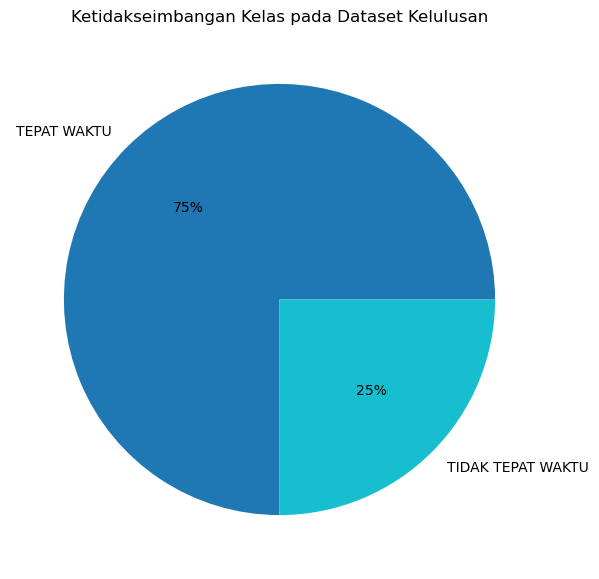

In [7]:
color = ['tab:blue', 'tab:cyan']
label = ["TEPAT WAKTU", "TIDAK TEPAT WAKTU"]

fig, ax = plt.subplots(figsize=(10,7))
ax.pie(data.statusKelulusan.value_counts(), labels=label, colors = color, autopct='%.0f%%')
ax.set_title('Ketidakseimbangan Kelas pada Dataset Kelulusan')
plt.show()

In [8]:
from imblearn import over_sampling
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_Data,Y_Target)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)


[('TEPAT WAKTU', 15), ('TIDAK TEPAT WAKTU', 15)] (30,)


In [9]:
from sklearn.model_selection import train_test_split
print("Data yang telah seimbang")
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=0)
print(x_train)

Data yang telah seimbang
    mka  sks   ipk
27   21   41  0.24
11   64  132  3.63
17   62  130  3.60
22   53  111  2.69
5    60  123  2.94
16   65  135  3.77
8    21   41  0.24
14   53  111  2.69
23   53  111  2.69
20   47   99  2.13
1    65  135  3.61
29   60  123  2.94
6    60  120  3.03
4    63  129  3.48
18   65  135  3.61
19   47   99  2.13
9    63  132  3.58
7    63  129  3.55
25   60  120  3.03
3    62  129  3.34
0    65  135  3.63
21   60  123  2.94
15   64  133  3.44
12   64  132  3.84


In [10]:
print("Tuning Parameter metode SVM pada data seimbang")
kernel_ds = ['linear','sigmoid','poly','rbf']
ker_ds = []
acc_ds = []

for i in kernel_ds :
  import pandas as pd
  from sklearn.model_selection import train_test_split
  from sklearn.svm import SVC
  from sklearn import metrics
  x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=0)
  
  svm_ds = SVC(
      kernel = i,
      C = 1,
      gamma = 0.1
  )

  svm_ds.fit(x_train,y_train)
  y_pred = svm_ds.predict(x_test)
  score = (metrics.accuracy_score(y_test, y_pred))

  ker_ds.append(i)
  acc_ds.append(score)

  dict = {
      'kernel' : ker_ds,
      'accuracy' : acc_ds
  }

  ds = pd.DataFrame(dict)
  


Tuning Parameter metode SVM pada data seimbang


In [11]:
ds.sort_values(by=['accuracy'], ascending =False)

,kernel,accuracy
0,linear,1.0
2,poly,1.0
3,rbf,1.0
1,sigmoid,0.5


In [12]:
from sklearn.svm import SVC
model = SVC(C=1,gamma=0.1,kernel='linear')
model.fit(x_train, y_train)


SVC(C=1, gamma=0.1, kernel='linear')

In [13]:
y_pred_ds = model.predict(x_test)

Data yang Seimbang
True Positive 3
True Negative 3
False Positive 0
False Negative 0


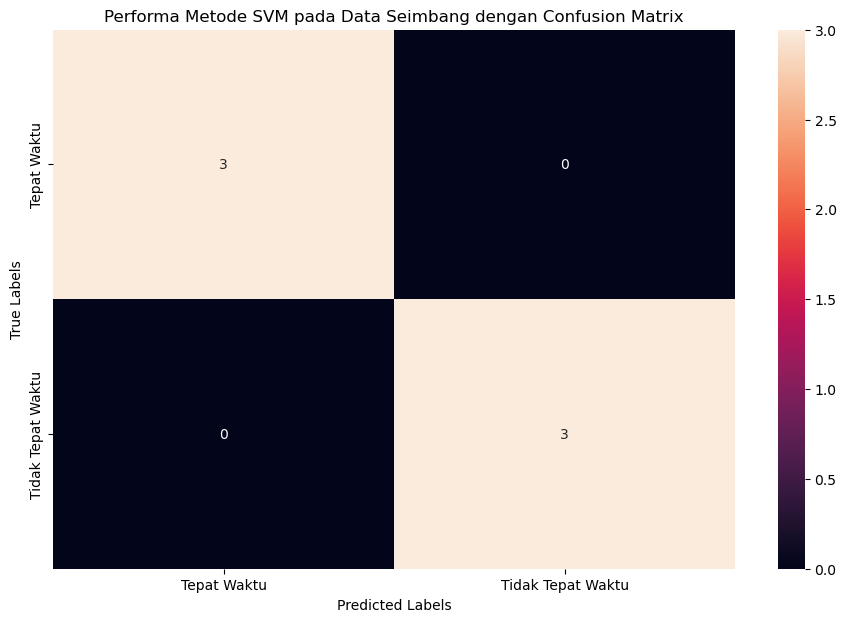

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_ds = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize =(11, 7))
sns.heatmap(cm_ds, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels'); ax.set_ylabel('True Labels')
ax.set_title('Performa Metode SVM pada Data Seimbang dengan Confusion Matrix')
ax.xaxis.set_ticklabels(['Tepat Waktu', 'Tidak Tepat Waktu']); ax.yaxis.set_ticklabels(['Tepat Waktu', 'Tidak Tepat Waktu'])

print("Data yang Seimbang")
TP = cm_ds[0, 0]
TN = cm_ds[1, 1]
FP = cm_ds[1, 0]
FN = cm_ds[0, 1]
print('True Positive', TP)
print('True Negative', TN)
print('False Positive', FP)
print('False Negative', FN)

accuracy = round((TP+TN) / float(TP+FN+TN+FP),4) * 100
sensitivity = round(TP / float(FN+TP),4) * 100
specitifity = round(TN / float(TN+FP),4) * 100


In [18]:
accuracy = round((TP+TN) / float(TP+FN+TN+FP),4) * 100
sensitivity = round(TP / float(FN+TP),4) * 100
specitifity = round(TN / float(TN+FP),4) * 100
print("Akurasi", accuracy)
print("Sensitivity", sensitivity)
print("Specitifity",specitifity)

Akurasi 100.0
Sensitivity 100.0
Specitifity 100.0


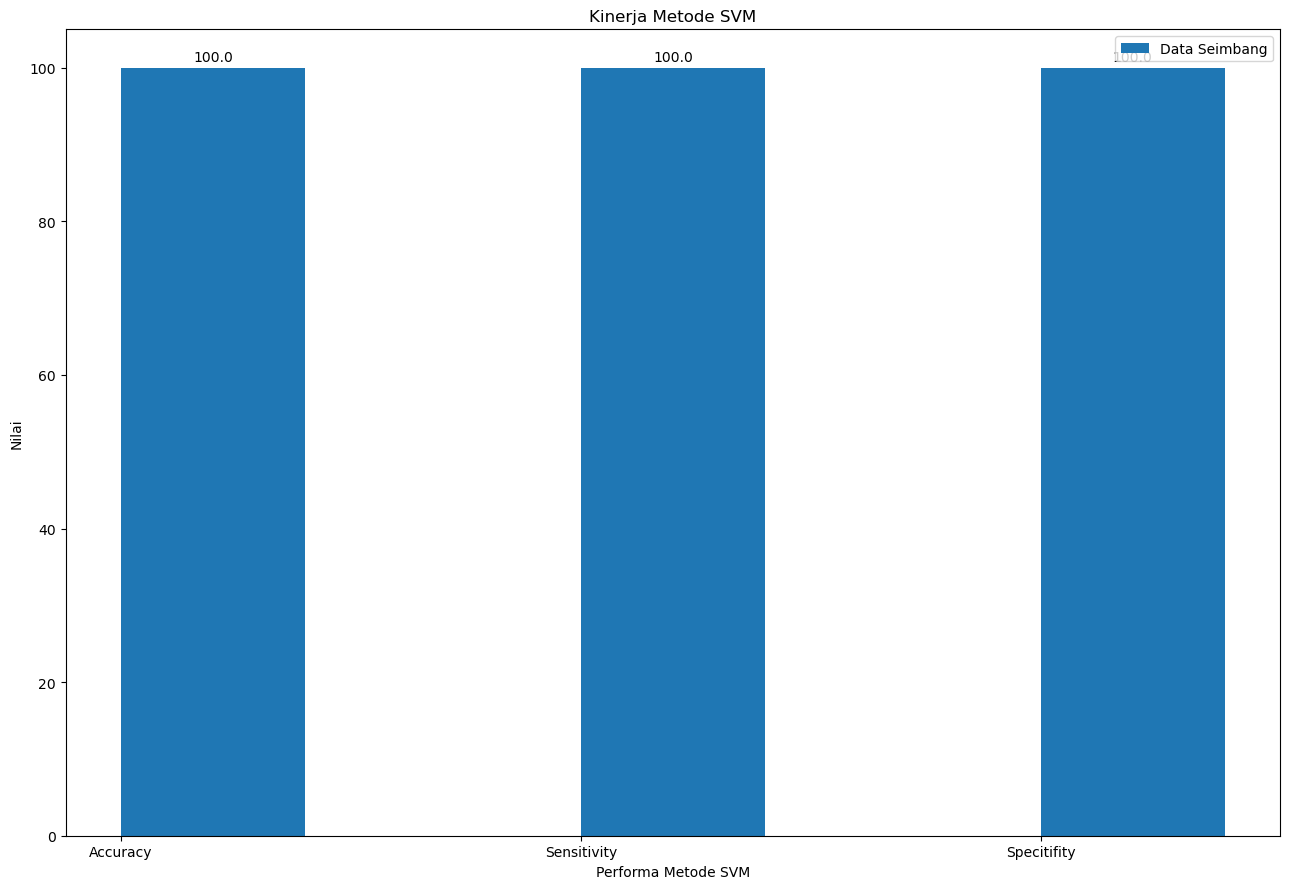

In [16]:
import matplotlib.pyplot as plt
import numpy as np
labels = ['Accuracy','Sensitivity','Specitifity']
kinerja_ds = [accuracy,sensitivity,specitifity]

x=np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(13,9))
rects2 = ax.bar(x+width/2, kinerja_ds, width, label='Data Seimbang')

ax.set_xlabel('Performa Metode SVM')
ax.set_ylabel('Nilai')
ax.set_title('Kinerja Metode SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x()+rect.get_width()/2, height),
                xytext=(0,3), 
                textcoords="offset points",
                ha='center', va='bottom')
    
autolabel(rects2)
fig.tight_layout()
plt.show()



In [17]:
import pickle
pickle.dump(model, open('model_svm.pkl', 'wb'))